# iauRefco 

In [33]:
import numpy as np

In [34]:
lapse=0.0065 # deg/m range is from 0.0055 to 0.0075
lat =-30.7 #deg
height=1054  #m above MSL
press=900 #mb
rh=0.3 # rel humid
za=70 # deg
t=27 #Celsius

In [35]:
def pwater(p,t,rh):
    e=( 0.7859 + 0.03477*t ) /( 1.0 + 0.00412*t )
    e=e*(1.0 + p * ( 4.5e-6 + 6e-10*t*t ) )
    psat=10**e # saturation pressure
    #print psat
    pw=rh*psat/(1.0 - (1.0-rh)*psat/p)
    return pw
    

In [36]:
print pwater(press,t,rh)

pw=pwater(press,t,rh)

11.1806961235


In [37]:
def gamma(p,t,pw): 
    tk=t+273.15
    g=(77.6890e-6*p - ( 6.3938e-6 - 0.375463/tk ) * pw ) / tk
    return g
    

In [38]:
def beta(t,pw):
    tk = t + 273.15
    b=4.4474e-6 * tk
    b=b- 0.0074 * pw * b
    return b


In [39]:
g=gamma(press,t,pw)
b=beta(t,pw)
refa=g*(1-b)
refb=g*(b-g/2.0)

print refa,refb

0.000278967498521 3.02991480123e-07


In [40]:
def refract(za,refa,refb):
    """
    given zenith angle (za) in degrees, refraction coefficients (refa,refb)
    return refraction in arcseconds
    """
    tanz=np.tan(np.deg2rad(za))
    r=refa*tanz + refb*tanz**3
    r=r*206265. # radians to arcseconds
    return r
                
print refract(za,refa,refb) #  arcsec159.38939230595153

159.38939230595153


In [41]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


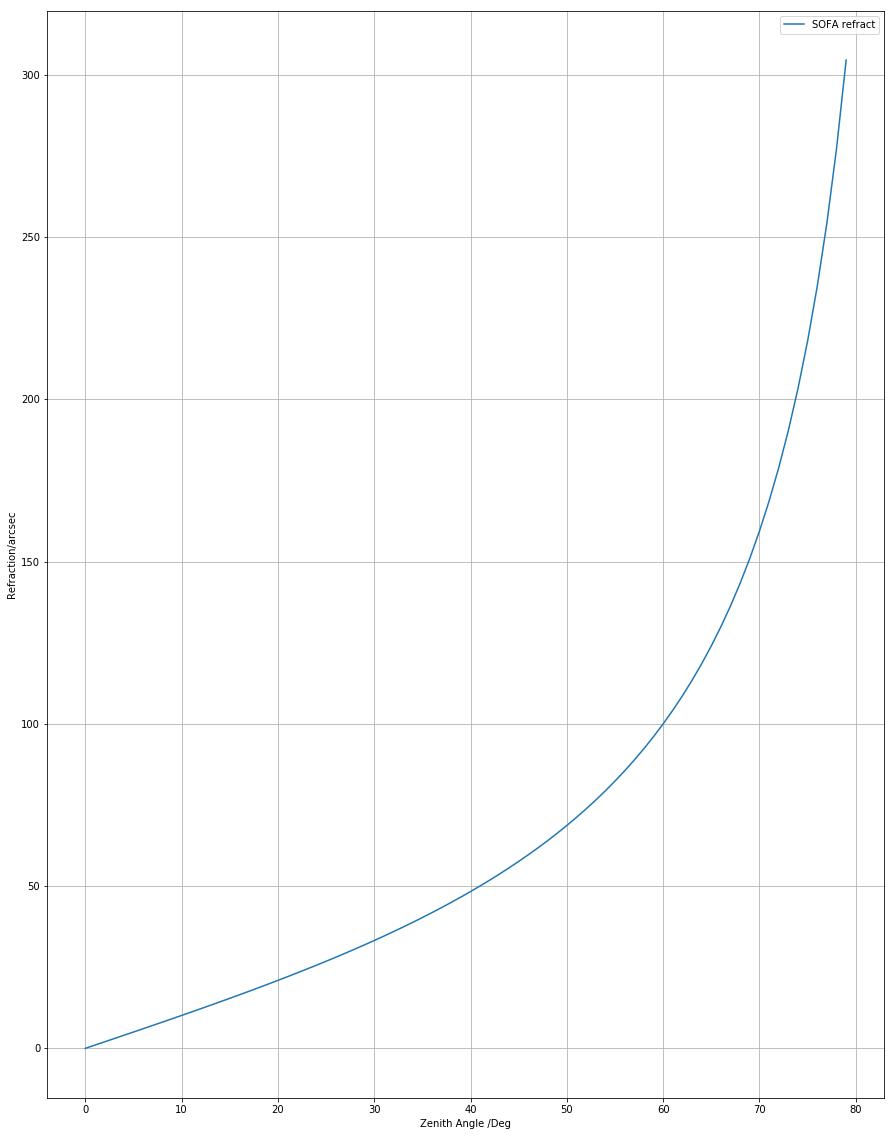

In [42]:
z=np.arange(0.,80.,1.)
pylab.figure(figsize=(15.,20.))
pylab.plot(z,refract(z,refa,refb),label='SOFA refract')
pylab.xlabel("Zenith Angle /Deg")
pylab.ylabel("Refraction/arcsec")
pylab.legend()
pylab.grid()
pylab.show()